In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cx_Oracle
from matplotlib import font_manager,rc
font_path = "/content/drive/MyDrive/L1/Notebooks/dataset/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False
%pwd

'/content'

In [3]:
# 개별 군집들의 평균 및 시각화 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [4]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*','<','>']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

# Preprocessing

In [5]:
df=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/full_data_with_label_FINAL.pkl')

df_1=df[['CUSTNO','RESIDENCE','AGEGROUP','GENDER','PURCHAMOUNT','RECEIPTNO','PURCHTIME']][df['spent_less_x']==1]
df_1

,CUSTNO,RESIDENCE,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME
0,00001,060,60세이상,M,342400,02857006,17
1,00001,060,60세이상,M,78000,02857007,17
2,00001,060,60세이상,M,500000,02857020,17
3,00001,060,60세이상,M,314640,02947490,12
4,00001,060,60세이상,M,406980,02947512,13
...,...,...,...,...,...,...,...
337916,19373,100,25세~29세,F,69000,02959987,17
337917,19373,100,25세~29세,F,17000,02959943,17
337918,19373,100,25세~29세,F,69000,02844688,20
337919,19373,100,25세~29세,F,29000,05366898,14


In [6]:
df_1.isnull().sum()

CUSTNO            0
RESIDENCE      1442
AGEGROUP          0
GENDER            0
PURCHAMOUNT       0
RECEIPTNO         0
PURCHTIME         0
dtype: int64

## Residence 결측값 치환

In [7]:
custno_residence=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/custno_residence.pkl')
custno_residence

,CUSTNO,STORENO,RESIDENCE
0,516,2,55
1,940,31,100
2,952,32,100
3,1084,9,100
4,1108,16,500
...,...,...,...
120,19233,37,100
121,19235,2,55
122,19288,1,100
123,19315,1,100


In [8]:
def get_null_res(x):
    if x['CUSTNO'] not in list(custno_residence['CUSTNO']):
        return int(x['RESIDENCE'])
    for i in range(len(custno_residence)):
      if x['CUSTNO']==custno_residence['CUSTNO'][i]:
        return int(custno_residence['RESIDENCE'][i])
      else : continue

df_1['CUSTNO']=df_1['CUSTNO'].astype('int64')
df_1['RESIDENCE_new']=df_1.apply(lambda x: get_null_res(x),axis=1)
df_1.drop('RESIDENCE',axis=1,inplace=True)
df_1.rename({'RESIDENCE_new':'RESIDENCE'},axis=1,inplace=True)
df_1

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME,RESIDENCE
0,1,60세이상,M,342400,02857006,17,60
1,1,60세이상,M,78000,02857007,17,60
2,1,60세이상,M,500000,02857020,17,60
3,1,60세이상,M,314640,02947490,12,60
4,1,60세이상,M,406980,02947512,13,60
...,...,...,...,...,...,...,...
337916,19373,25세~29세,F,69000,02959987,17,100
337917,19373,25세~29세,F,17000,02959943,17,100
337918,19373,25세~29세,F,69000,02844688,20,100
337919,19373,25세~29세,F,29000,05366898,14,100


In [9]:
df_1.isnull().sum()

CUSTNO         0
AGEGROUP       0
GENDER         0
PURCHAMOUNT    0
RECEIPTNO      0
PURCHTIME      0
RESIDENCE      0
dtype: int64

## AGEGROUP, GENDER encoding

In [10]:
np.sort(df_1.AGEGROUP.unique())

array(['19세이하', '20세~24세', '25세~29세', '30세~34세', '35세~39세', '40세~44세',
       '45세~49세', '50세~54세', '55세~59세', '60세이상'], dtype=object)

In [11]:
df_1['AGEGROUP']=df_1['AGEGROUP'].apply(lambda x: 0 if x=='19세이하'
                                           else 1 if x=='20세~24세'
                                           else 2 if x=='25세~29세'
                                           else 3 if x=='30세~34세'
                                           else 4 if x=='35세~39세'
                                           else 5 if x=='40세~44세'
                                           else 6 if x=='45세~49세'
                                           else 7 if x=='50세~54세'
                                           else 8 if x=='55세~59세'
                                           else 9)
df_1['GENDER']=df_1['GENDER'].apply(lambda x: 0 if x=='M'
                                       else 1)
df_1

,CUSTNO,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME,RESIDENCE
0,1,9,0,342400,02857006,17,60
1,1,9,0,78000,02857007,17,60
2,1,9,0,500000,02857020,17,60
3,1,9,0,314640,02947490,12,60
4,1,9,0,406980,02947512,13,60
...,...,...,...,...,...,...,...
337916,19373,2,1,69000,02959987,17,100
337917,19373,2,1,17000,02959943,17,100
337918,19373,2,1,69000,02844688,20,100
337919,19373,2,1,29000,05366898,14,100


## 그룹화 (CUSTNO)

- AGEGROUP : mean 사용, 평균 연령대 산출
    - 19세이하 = 0
    - 20세~24세 = 1
    - 25세~29세 = 2
    - 30세~34세 = 3
    - 35세~39세 = 4
    - 40세~44세 = 5
    - 45세~49세 = 6
    - 50세~54세 = 7
    - 55세~59세 = 8
    - 60세이상 = 9

- GENDER : mean 사용, 여성 비율 산출
    - M = 0
    - F = 1

- PURCHAMOUNT : sum 사용, 해당 고객의 14년-15년 가을시즌 총 구매액 산출 

- RECEIPTNO : len(x.unique()), 중복 없이 고객 당 14년-15년 가을시즌 총 구매 빈도 산출

- PURCHTIME : mode 사용, 해당 고객의 주 거래 시간 산출

- RESIDENCE : mode 사용, 해당 고객의 주 거주지 산출

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172066 entries, 0 to 337920
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CUSTNO       172066 non-null  int64 
 1   AGEGROUP     172066 non-null  int64 
 2   GENDER       172066 non-null  int64 
 3   PURCHAMOUNT  172066 non-null  int64 
 4   RECEIPTNO    172066 non-null  object
 5   PURCHTIME    172066 non-null  int64 
 6   RESIDENCE    172066 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 10.5+ MB


## 카테고리화

### RECEPITNO 카테고리화

- 1 : 0 <= 영수증 개수 <25

- 2 : 25 <= 영수증 개수 < 50

- 3 : 50 <= 영수증 개수 < 75

- 4 : 75 <= 영수증개수

,AGEGROUP,GENDER,PURCHAMOUNT,PURCHTIME,RESIDENCE,RECEIPTNO
CUSTNO,,,,,,
1,9,0,9336600,13,60,2
4,9,1,1961650,14,16,1
8,9,0,566800,14,10,1
9,9,1,28180290,15,100,4
13,9,1,136300,15,210,1
...,...,...,...,...,...,...
19361,6,1,491900,17,100,1
19364,2,1,253600,13,210,1
19371,7,1,148000,15,52,1


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


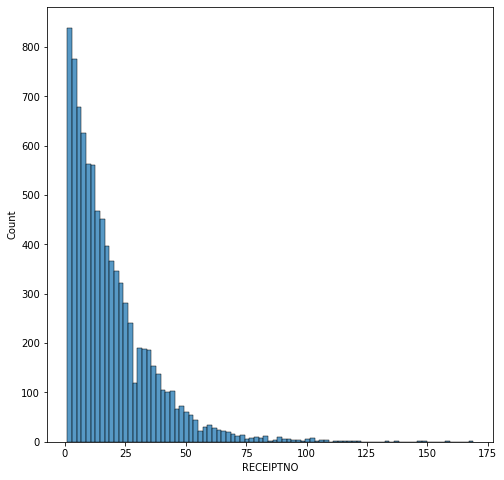

In [13]:
# 집계함수 사용, df_1 그룹화
aggregations={'AGEGROUP':'mean',
              'GENDER':'mean',
              'PURCHAMOUNT':'sum',
              'RECEIPTNO':lambda x:len(x.unique()),
              'PURCHTIME':lambda x:x.mode()[0],
              'RESIDENCE':lambda x:x.mode()[0]}
df_g=df_1.groupby('CUSTNO').agg(aggregations)

# RECEIPTNO 칼럼 시각화, 분포 확인 
fig=plt.figure(figsize=(8,8))
sns.histplot(df_g.RECEIPTNO)

# RECEIPTNO_cat 칼럼 생성
# 전처리
df_g['RECEIPTNO_cat']=df_g.apply(lambda x: 1 if (x['RECEIPTNO']>=0) & (x['RECEIPTNO']<25)
                                      else 2 if (x['RECEIPTNO']>=25) & (x['RECEIPTNO']<50)
                                      else 3 if (x['RECEIPTNO']>=50) & (x['RECEIPTNO']<75)
                                      else 4,axis=1)
df_g.drop('RECEIPTNO',axis=1,inplace=True)
df_g.rename({'RECEIPTNO_cat':'RECEIPTNO'},axis=1,inplace=True)
df_g

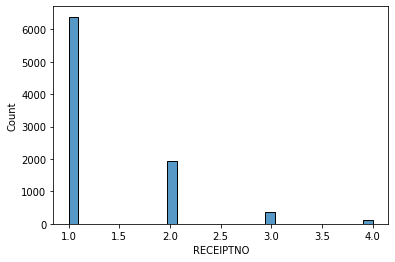

In [14]:
sns.histplot(df_g.RECEIPTNO)

### RESIDENCE 카테고리화

그래프를 살펴봤을 때

-  10 ~ 87 : 서울 ; 1

- 100, 210 : 경인 ; 2

- else ; 3 이 서로 분포가 비슷

이 기준에 따라 분류

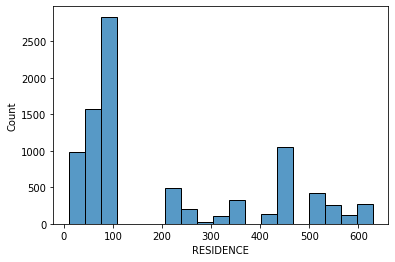

In [15]:
sns.histplot(df_g.RESIDENCE)

In [16]:
df_g['RESIDENCE_cat']=df_g.apply(lambda x: 1 if x['RESIDENCE'] in [10,13,16,20,24,27,30,33,36,39,43,45,47,49,52,55,60,65,69,72,75,79,82,85,87]
                                      else 2 if x['RESIDENCE'] in [100,210]
                                      else 3,axis=1)
df_g.drop('RESIDENCE',axis=1,inplace=True)
df_g.rename({'RESIDENCE_cat':'RESIDENCE'},axis=1,inplace=True)

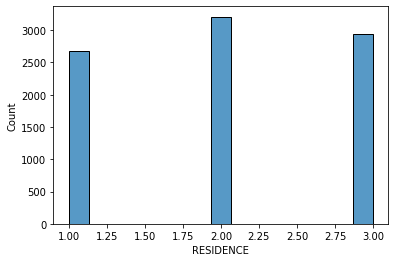

In [17]:
sns.histplot(df_g.RESIDENCE)

### PURCHTIME 카테고리화

- 영업시간 (1000 - 2300)
    - 주간 1 : 1000 - 1400 ; 1
    - 주간 2 : 1500 - 1900 ; 2
    - 야간 : 2000 - 2300 ; 3
- 영업 외 시간 ; 0
    - 온라인 채널 이용으로 추정 (그런데 거의 존재 x)

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

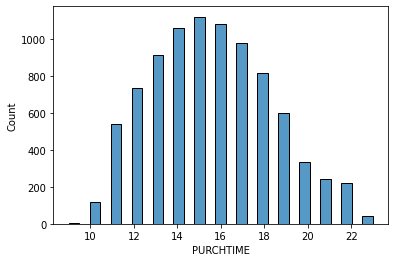

In [18]:
sns.histplot(df_g.PURCHTIME)
np.sort(df_g.PURCHTIME.unique())

,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,RESIDENCE,TIME
CUSTNO,,,,,,
1,9,0,9336600,2,1,1
4,9,1,1961650,1,1,1
8,9,0,566800,1,1,1
9,9,1,28180290,4,2,2
13,9,1,136300,1,2,2
...,...,...,...,...,...,...
19361,6,1,491900,1,2,2
19364,2,1,253600,1,2,1
19371,7,1,148000,1,1,2


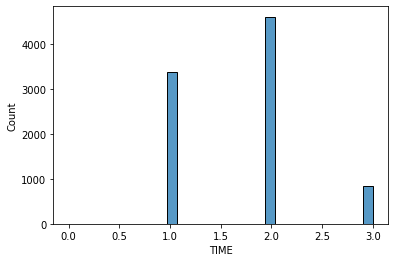

In [19]:
df_g['PURCHTIME_cat']=df_g.apply(lambda x : 1 if (10<=x['PURCHTIME']) & (x['PURCHTIME']<15)
                                       else 2 if (15<=x['PURCHTIME']) & (x['PURCHTIME']<20)
                                       else 3 if (20<=x['PURCHTIME']) & (x['PURCHTIME']<=23)
                                       else 0,axis=1)
df_g.drop('PURCHTIME',axis=1,inplace=True)
df_g.rename({'PURCHTIME_cat':'TIME'},axis=1,inplace=True)
sns.histplot(df_g.TIME)
df_g

### PURCHAMOUNT 카테고리화

- 일반 고객 
    - 일반 1 : 100만원 미만 ; 5
    - 일반 2 : 100만원 이상 ; 4

- 우수 고객 : 롯데 백화점 우수 고객 선정 기준 사용 ( (기준 연간 매출 * 가을 시즌 비중) * 2 )

    - VIP : 400만원 * 0.27 * 2 = 216만원 이상 ; 3 
    - VIP + : 800만원 * 0.27 * 2 = 432만원 이상 ; 2
    - MVG : 1800만원 * 0.27 * 2 = 972만원 이상 ; 1

In [20]:
import webbrowser
webbrowser.open('https://www.lotteshopping.com/vipBenefit/selectionCriteria')

False

,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,RESIDENCE,TIME
count,8818.000000,8818.000000,8.818000e+03,8818.000000,8818.000000,8818.000000
mean,5.633931,0.822409,3.694551e+06,1.342935,2.029599,1.712293
std,1.842879,0.382190,1.772114e+07,0.620887,0.797045,0.629786
min,0.000000,0.000000,1.500000e+03,1.000000,1.000000,0.000000
25%,4.000000,1.000000,2.681250e+05,1.000000,1.000000,1.000000
50%,6.000000,1.000000,8.601050e+05,1.000000,2.000000,2.000000
75%,7.000000,1.000000,3.325120e+06,2.000000,3.000000,2.000000
max,9.000000,1.000000,1.330292e+09,4.000000,3.000000,3.000000


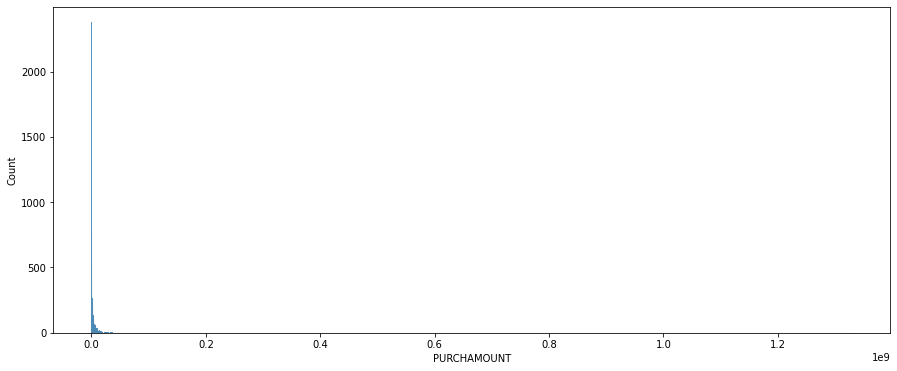

In [21]:
fig=plt.figure(figsize=(15,6))
sns.histplot(df_g.PURCHAMOUNT)
df_g.describe()

In [22]:
df_g['PURCHAMOUNT_cat']=df_g.apply(lambda x : 5 if x['PURCHAMOUNT']<1000000
                                         else 4 if (1000000<=x['PURCHAMOUNT']) & (x['PURCHAMOUNT']<2160000)
                                         else 3 if (2160000<=x['PURCHAMOUNT']) & (x['PURCHAMOUNT']<4320000)
                                         else 2 if (4320000<=x['PURCHAMOUNT']) & (x['PURCHAMOUNT']<9720000)
                                         else 1,axis=1)
df_g.drop(['PURCHAMOUNT'],axis=1,inplace=True)
df_g.rename({'PURCHAMOUNT_cat':'PURCHAMOUNT'},axis=1,inplace=True)
df_g.reset_index(inplace=True)
df_g

,CUSTNO,AGEGROUP,GENDER,RECEIPTNO,RESIDENCE,TIME,PURCHAMOUNT
0,1,9,0,2,1,1,2
1,4,9,1,1,1,1,4
2,8,9,0,1,1,1,5
3,9,9,1,4,2,2,1
4,13,9,1,1,2,2,5
...,...,...,...,...,...,...,...
8813,19361,6,1,1,2,2,5
8814,19364,2,1,1,2,1,5
8815,19371,7,1,1,1,2,5
8816,19372,4,1,2,2,1,2


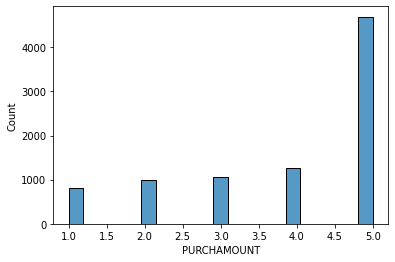

In [23]:
sns.histplot(df_g.PURCHAMOUNT)

In [24]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CUSTNO       8818 non-null   int64
 1   AGEGROUP     8818 non-null   int64
 2   GENDER       8818 non-null   int64
 3   RECEIPTNO    8818 non-null   int64
 4   RESIDENCE    8818 non-null   int64
 5   TIME         8818 non-null   int64
 6   PURCHAMOUNT  8818 non-null   int64
dtypes: int64(7)
memory usage: 482.4 KB


## 유통 채널 (Online, Offline) 속성 생성

- offline cahnnel만 이용 = 0
- TOTAL_USE = 0 이 아닌 고객들은 online channel 이용 횟수를 분위수에 기반해 분류
    - 5회 이하 : 1
    - 15회 이하 : 2
    - 25회 이하 : 3
    - 25회 이상

In [25]:
channel_grouped=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/channel_grouped.pkl')
channel_grouped

,CHANNEL,CUSNO,TOTAL_USE
0,A_MOBILE/APP,00007,4
1,A_MOBILE/APP,00014,1
2,A_MOBILE/APP,00074,1
3,A_MOBILE/APP,00112,16
4,A_MOBILE/APP,00122,27
...,...,...,...
8819,D_MOBILE/APP,19354,4
8820,D_MOBILE/APP,19355,1
8821,D_MOBILE/APP,19360,1
8822,D_MOBILE/APP,19377,5


In [26]:
mask=(channel_grouped['CHANNEL']=='A_MOBILE/APP') | (channel_grouped['CHANNEL']=='B_MOBILE/APP') |\
     (channel_grouped['CHANNEL']=='B_ONLINEMALL') 
channel_e=channel_grouped[mask][['CUSNO','TOTAL_USE']]
channel_e=channel_e.groupby('CUSNO').sum()
channel_e.reset_index(inplace=True)
channel_e['CUSNO']=channel_e['CUSNO'].astype('int64')
channel_e.rename({'CUSNO':'CUSTNO'},axis=1,inplace=True)
channel=channel_e.copy()
channel_e

,CUSTNO,TOTAL_USE
0,7,4
1,14,1
2,42,23
3,74,42
4,94,14
...,...,...
6145,19353,9
6146,19374,3
6147,19376,1
6148,19381,5


,CUSTNO,TOTAL_USE
count,6150.000000,6150.000000
mean,9639.597073,18.748130
std,4978.328793,20.774564
min,7.000000,1.000000
25%,5727.500000,4.000000
50%,9342.500000,12.000000
75%,13653.000000,27.000000
max,19382.000000,327.000000


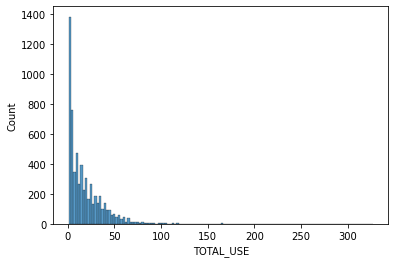

In [27]:
sns.histplot(channel_e.TOTAL_USE)
channel_e.describe()

In [28]:
channel_e['TOTAL_USE_cat']=channel_e.apply(lambda x : 1 if x['TOTAL_USE']<=5
                                                 else 2 if (5<x['TOTAL_USE']) & (x['TOTAL_USE']<=15)
                                                 else 3 if (15<x['TOTAL_USE']) & (x['TOTAL_USE']<=25)
                                                 else 4,axis=1)
channel_e.drop('TOTAL_USE',axis=1,inplace=True)
channel_e.rename({'TOTAL_USE_cat':'TOTAL_USE'},axis=1,inplace=True)
channel_e['CUSTNO']=channel_e['CUSTNO'].astype('int64')
channel_e

,CUSTNO,TOTAL_USE
0,7,1
1,14,1
2,42,3
3,74,4
4,94,2
...,...,...
6145,19353,2
6146,19374,1
6147,19376,1
6148,19381,1


In [29]:
edf_merge=pd.merge(df_g,channel_e,how='left',on='CUSTNO')
edf_merge['TOTAL_USE'].fillna(0,inplace=True)
edf_merge['TOTAL_USE']=edf_merge['TOTAL_USE'].astype('int64')
edf_merge

,CUSTNO,AGEGROUP,GENDER,RECEIPTNO,RESIDENCE,TIME,PURCHAMOUNT,TOTAL_USE
0,1,9,0,2,1,1,2,0
1,4,9,1,1,1,1,4,0
2,8,9,0,1,1,1,5,0
3,9,9,1,4,2,2,1,0
4,13,9,1,1,2,2,5,0
...,...,...,...,...,...,...,...,...
8813,19361,6,1,1,2,2,5,0
8814,19364,2,1,1,2,1,5,0
8815,19371,7,1,1,1,2,5,0
8816,19372,4,1,2,2,1,2,0


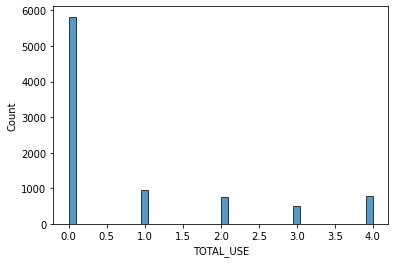

In [30]:
sns.histplot(edf_merge.TOTAL_USE)

## 경쟁사 이용 여부 속성 생성

- 경쟁사 이용 이력 없음 = 0

- 경쟁사 이용 하 (4회 이하)

- 경쟁사 이용 중 (4회 초과 8회 이하)

- 경쟁사 이용 상 (8회 초과 12회 이하

,CUSTNO,USE_COMP
0,1,9
1,2,5
2,4,2
3,7,1
4,8,3
...,...,...
5084,19370,11
5085,19372,2
5086,19375,3
5087,19376,1


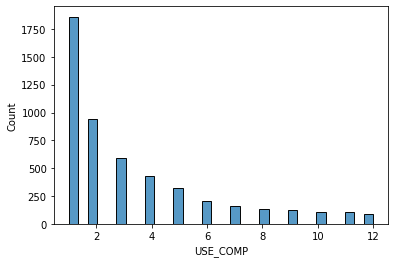

In [31]:
competitor_filtering=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/competitor_filtering.pkl')
aggregations={'COMPETITOR':'count',
              'USAGE_DATE':lambda x:len(x.unique())}
comp=competitor_filtering.groupby('CUSTNO').agg(aggregations)
comp.reset_index(inplace=True)
comp.rename({'USAGE_DATE':'USE_COMP'},axis=1,inplace=True)
comp.drop('COMPETITOR',axis=1,inplace=True)
comp['CUSTNO']=comp['CUSTNO'].astype('int64')
sns.histplot(comp.USE_COMP)
ccomp=comp.copy()
comp

In [32]:
np.sort(comp.USE_COMP.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [33]:
comp['USE_COMP_cat']=comp.apply(lambda x : 1 if x['USE_COMP']<=4
                                      else 2 if (4<x['USE_COMP']) & (x['USE_COMP']<=8)
                                      else 3,axis=1)
comp.drop('USE_COMP',axis=1,inplace=True)
comp.rename({'USE_COMP_cat':'USE_COMP'},axis=1,inplace=True)
comp

,CUSTNO,USE_COMP
0,1,3
1,2,2
2,4,1
3,7,1
4,8,1
...,...,...
5084,19370,3
5085,19372,1
5086,19375,1
5087,19376,1


In [34]:
edf_merge1=pd.merge(edf_merge,comp,how='left',on='CUSTNO')
edf_merge1['USE_COMP'].fillna(0,inplace=True)
edf_merge1['USE_COMP']=edf_merge1['USE_COMP'].astype('int64')
edf_merge1

,CUSTNO,AGEGROUP,GENDER,RECEIPTNO,RESIDENCE,TIME,PURCHAMOUNT,TOTAL_USE,USE_COMP
0,1,9,0,2,1,1,2,0,3
1,4,9,1,1,1,1,4,0,1
2,8,9,0,1,1,1,5,0,1
3,9,9,1,4,2,2,1,0,0
4,13,9,1,1,2,2,5,0,0
...,...,...,...,...,...,...,...,...,...
8813,19361,6,1,1,2,2,5,0,0
8814,19364,2,1,1,2,1,5,0,0
8815,19371,7,1,1,1,2,5,0,0
8816,19372,4,1,2,2,1,2,0,1


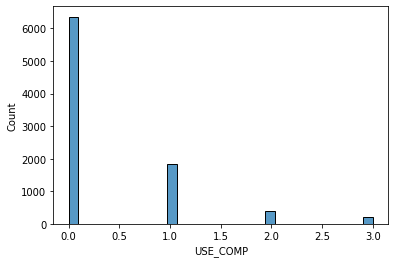

In [35]:
sns.histplot(edf_merge1.USE_COMP)

## 멤버십 가입 여부 속성 생성

- 멤버십에 가입되어 있지 않은 고객 = 0

- 0이 아닌 고객은 가입된 멤버십 개수 산출

In [36]:
mem_df=pd.read_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/mmembership.pkl')
mem_df

,고객번호,멤버십명,가입년월
0,00011,하이마트,201512
1,00021,하이마트,201506
2,00037,하이마트,201306
3,00043,하이마트,201403
4,00044,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


In [37]:
# 복수 멤버십 가입한 고객들 존재
len(mem_df['고객번호'].unique())

6498

In [38]:
aggregations={'멤버십명':lambda x:len(x.unique()),'가입년월':'count'}
mem_g=mem_df.groupby('고객번호').agg(aggregations)
mem_g.drop('가입년월',axis=1,inplace=True)
mem_g.reset_index(inplace=True)
mem_g.rename({'고객번호':'CUSTNO','멤버십명':'NUMB_MEM'},axis=1,inplace=True)
mem_g['CUSTNO']=mem_g['CUSTNO'].astype('int64')
mem_g

,CUSTNO,NUMB_MEM
0,11,1
1,21,1
2,37,1
3,43,1
4,44,1
...,...,...
6493,19377,1
6494,19379,1
6495,19380,1
6496,19381,1


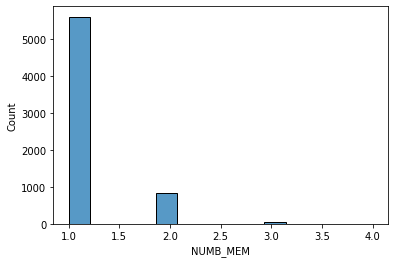

In [39]:
sns.histplot(mem_g.NUMB_MEM)

In [40]:
edf_merge2=pd.merge(edf_merge1,mem_g,how='left',on='CUSTNO')
edf_merge2.fillna(0,inplace=True)
edf_merge2['NUMB_MEM']=edf_merge2['NUMB_MEM'].astype('int64')
edf_merge2

,CUSTNO,AGEGROUP,GENDER,RECEIPTNO,RESIDENCE,TIME,PURCHAMOUNT,TOTAL_USE,USE_COMP,NUMB_MEM
0,1,9,0,2,1,1,2,0,3,0
1,4,9,1,1,1,1,4,0,1,0
2,8,9,0,1,1,1,5,0,1,0
3,9,9,1,4,2,2,1,0,0,0
4,13,9,1,1,2,2,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8813,19361,6,1,1,2,2,5,0,0,1
8814,19364,2,1,1,2,1,5,0,0,1
8815,19371,7,1,1,1,2,5,0,0,1
8816,19372,4,1,2,2,1,2,0,1,0


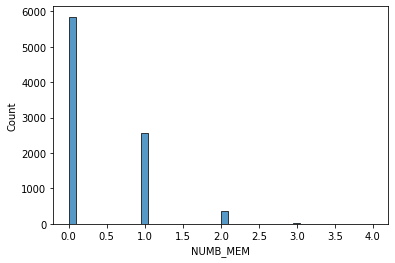

In [41]:
sns.histplot(edf_merge2.NUMB_MEM)

In [42]:
edf_merge2.rename({'RECEIPTNO':'FREQUENCY','PURCHTIME':'TIME','TOTAL_USE':'CHANNEL'},axis=1,inplace=True)
edf_merge2

,CUSTNO,AGEGROUP,GENDER,FREQUENCY,RESIDENCE,TIME,PURCHAMOUNT,CHANNEL,USE_COMP,NUMB_MEM
0,1,9,0,2,1,1,2,0,3,0
1,4,9,1,1,1,1,4,0,1,0
2,8,9,0,1,1,1,5,0,1,0
3,9,9,1,4,2,2,1,0,0,0
4,13,9,1,1,2,2,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8813,19361,6,1,1,2,2,5,0,0,1
8814,19364,2,1,1,2,1,5,0,0,1
8815,19371,7,1,1,1,2,5,0,0,1
8816,19372,4,1,2,2,1,2,0,1,0


In [43]:
edf_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8818 entries, 0 to 8817
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CUSTNO       8818 non-null   int64
 1   AGEGROUP     8818 non-null   int64
 2   GENDER       8818 non-null   int64
 3   FREQUENCY    8818 non-null   int64
 4   RESIDENCE    8818 non-null   int64
 5   TIME         8818 non-null   int64
 6   PURCHAMOUNT  8818 non-null   int64
 7   CHANNEL      8818 non-null   int64
 8   USE_COMP     8818 non-null   int64
 9   NUMB_MEM     8818 non-null   int64
dtypes: int64(10)
memory usage: 757.8 KB


# Clustering

- 스케일링 후의 데이터에서 더 나은 분류 형태를 볼 수 있으므로 스케일링 후 클러스터링 선택

## 분포 확인

- 카테고리형 변수들이므로 스케일링 없이 바로 클러스터링 실시

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


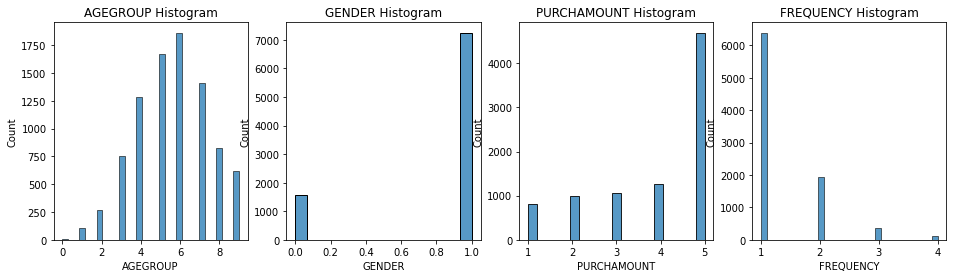

In [44]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(figsize=(16,4),nrows=1,ncols=4)

ax1.set_title('AGEGROUP Histogram')
sns.histplot(edf_merge2['AGEGROUP'],ax=ax1)

ax2.set_title('GENDER Histogram')
sns.histplot(edf_merge2['GENDER'],ax=ax2)

ax3.set_title('PURCHAMOUNT Histogram')
sns.histplot(edf_merge2['PURCHAMOUNT'],ax=ax3)

ax4.set_title('FREQUENCY Histogram')
sns.histplot(edf_merge2['FREQUENCY'],ax=ax4)

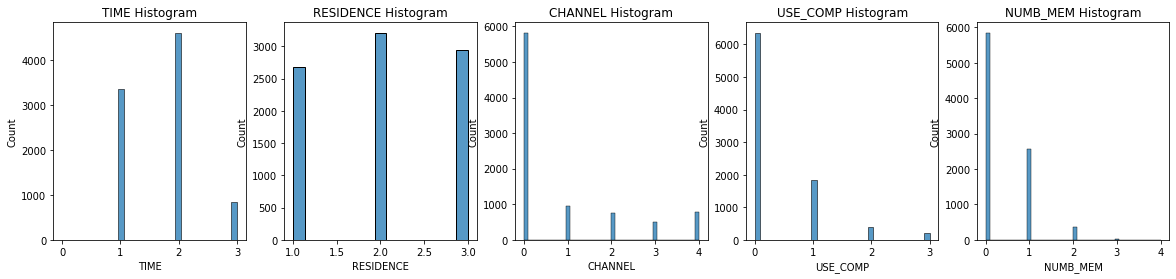

In [45]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(figsize=(20,4),nrows=1,ncols=5)

ax1.set_title('TIME Histogram')
sns.histplot(edf_merge2['TIME'],ax=ax1)

ax2.set_title('RESIDENCE Histogram')
sns.histplot(edf_merge2['RESIDENCE'],ax=ax2)

ax3.set_title('CHANNEL Histogram')
sns.histplot(edf_merge2['CHANNEL'],ax=ax3)

ax4.set_title('USE_COMP Histogram')
sns.histplot(edf_merge2['USE_COMP'],ax=ax4)

ax5.set_title('NUMB_MEM Histogram')
sns.histplot(edf_merge2['NUMB_MEM'],ax=ax5)

## 군집화, cluster_label 생성


### 수정 없이 클러스터링

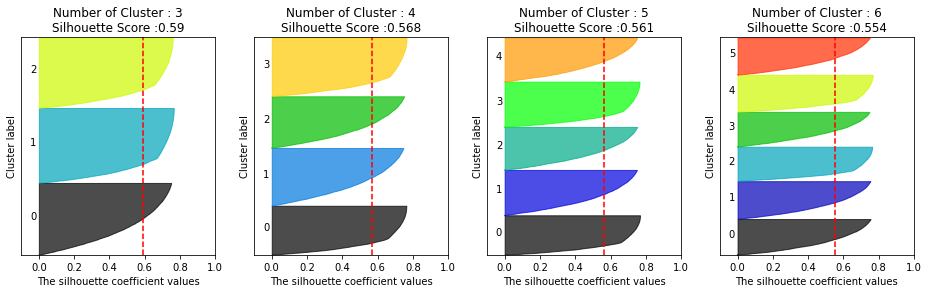

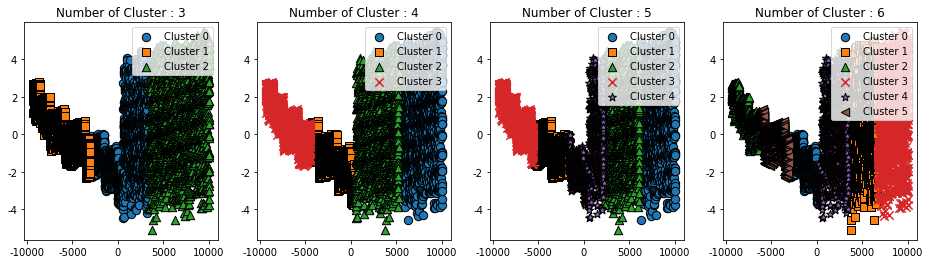

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

visualize_silhouette([3,4,5,6],edf_merge2)
visualize_kmeans_plot_multi([3,4,5,6],edf_merge2)

### 스케일링 후 클러스터링

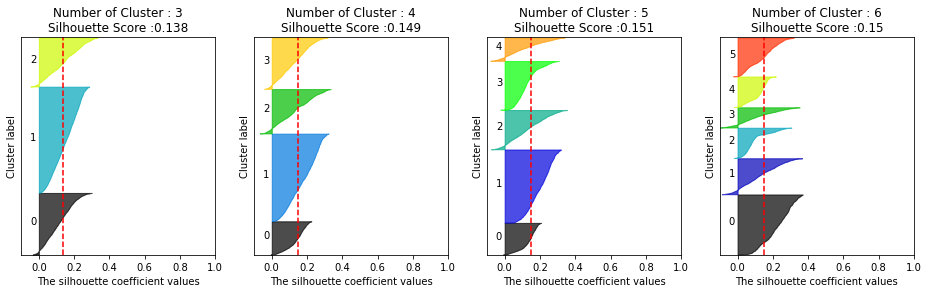

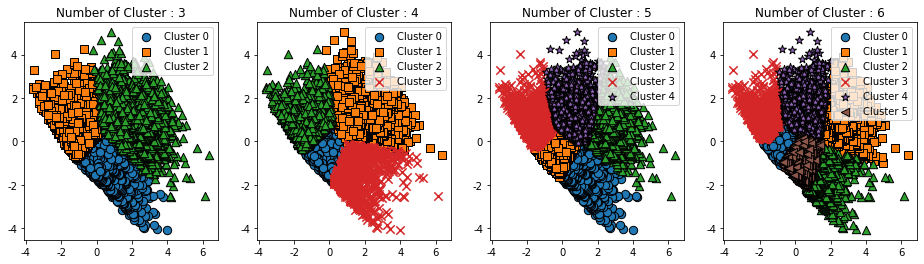

In [47]:
from sklearn.preprocessing import StandardScaler
edf_log=np.log1p(edf_merge2)
edf_scaled_array=StandardScaler().fit_transform(edf_log)
edf_scaled=pd.DataFrame(edf_scaled_array,columns=edf_log.columns)

visualize_silhouette([3,4,5,6],edf_scaled)
visualize_kmeans_plot_multi([3,4,5,6],edf_scaled)

In [48]:
from sklearn.cluster import KMeans
labels=KMeans(n_clusters=5,random_state=0).fit_predict(edf_scaled)
edf_merge2['labels']=labels
edf_merge2

,CUSTNO,AGEGROUP,GENDER,FREQUENCY,RESIDENCE,TIME,PURCHAMOUNT,CHANNEL,USE_COMP,NUMB_MEM,labels
0,1,9,0,2,1,1,2,0,3,0,4
1,4,9,1,1,1,1,4,0,1,0,4
2,8,9,0,1,1,1,5,0,1,0,4
3,9,9,1,4,2,2,1,0,0,0,4
4,13,9,1,1,2,2,5,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
8813,19361,6,1,1,2,2,5,0,0,1,3
8814,19364,2,1,1,2,1,5,0,0,1,3
8815,19371,7,1,1,1,2,5,0,0,1,3
8816,19372,4,1,2,2,1,2,0,1,0,2


In [49]:
edf_merge2.to_pickle('/content/drive/MyDrive/L1/Notebooks/dataset/cluster_label_df.pkl')

## 각 cluster 요약

- CUSTNO : 해당 클러스터의 고객 수

- AGEGROUP : 해당 클러스터의 평균 연령대

- GENDER : 해당 클러스터의 여성 비율

- PURCHAMOUNT : 해당 클러스터의 평균 구매 금액

- FREQUENCY : 해당클러스터의 평균 구매 빈도

- TIME : 해당 클러스터의 주 이용 시간

- RESIDENCE : 해당 클러스터의 주 거주지

- CHANNEL : 해당 클러스터의 평균 온라인 채털 이용 수

- USE_COMP : 해당 클러스터의 평균 경쟁사 이용 횟수

- NUMB_MEM : 해당 클러스터의 평균 멤버십 가입 개수

In [50]:
aggregations={'AGEGROUP':'mean',
              'GENDER':'mean',
              'PURCHAMOUNT':'sum',
              'RECEIPTNO':lambda x : len(x.unique()),
              'PURCHTIME':'mean',
              'RESIDENCE':lambda x : x.mode()
              }
gr=df_1.groupby('CUSTNO').agg(aggregations)
gr

,AGEGROUP,GENDER,PURCHAMOUNT,RECEIPTNO,PURCHTIME,RESIDENCE
CUSTNO,,,,,,
1,9,0,9336600,43,14.444444,60
4,9,1,1961650,18,14.500000,16
8,9,0,566800,8,14.500000,10
9,9,1,28180290,102,14.901961,100
13,9,1,136300,2,16.500000,210
...,...,...,...,...,...,...
19361,6,1,491900,6,18.333333,100
19364,2,1,253600,1,13.000000,210
19371,7,1,148000,1,15.000000,52


In [51]:
ggr=gr[['PURCHAMOUNT','RECEIPTNO']]
ggr

,PURCHAMOUNT,RECEIPTNO
CUSTNO,,
1,9336600,43
4,1961650,18
8,566800,8
9,28180290,102
13,136300,2
...,...,...
19361,491900,6
19364,253600,1
19371,148000,1


In [52]:
gggr=pd.merge(df_g,ggr,how='left',on='CUSTNO')
gggr.rename({'RECEIPTNO_x':'FREQUENCY_cat','PURCHAMOUNT_x':'PURCHAMOUNT_cat',
             'PURCHAMOUNT_y':'PURCHAMOUNT','RECEIPTNO_y':'FREQUENCY'},axis=1,inplace=True)
gggr=gggr[['CUSTNO','GENDER','AGEGROUP','RESIDENCE','FREQUENCY_cat','FREQUENCY','PURCHAMOUNT_cat','PURCHAMOUNT','TIME']]
summary_df=pd.merge(gggr,channel,how='left',on='CUSTNO')
summary_df.fillna(0,inplace=True)
summary_df=pd.merge(summary_df,ccomp,how='left',on='CUSTNO')
summary_df.fillna(0,inplace=True)
summary_df=pd.merge(summary_df,mem_g,how='left',on='CUSTNO')
summary_df.fillna(0,inplace=True)
summary_df['TOTAL_USE']=summary_df['TOTAL_USE'].astype('int64')
summary_df['USE_COMP']=summary_df['USE_COMP'].astype('int64')
summary_df['NUMB_MEM']=summary_df['NUMB_MEM'].astype('int64')
summary_df['labels']=labels
summary_df

,CUSTNO,GENDER,AGEGROUP,RESIDENCE,FREQUENCY_cat,FREQUENCY,PURCHAMOUNT_cat,PURCHAMOUNT,TIME,TOTAL_USE,USE_COMP,NUMB_MEM,labels
0,1,0,9,1,2,43,2,9336600,1,0,9,0,4
1,4,1,9,1,1,18,4,1961650,1,0,2,0,4
2,8,0,9,1,1,8,5,566800,1,0,3,0,4
3,9,1,9,2,4,102,1,28180290,2,0,0,0,4
4,13,1,9,2,1,2,5,136300,2,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8813,19361,1,6,2,1,6,5,491900,2,0,0,1,3
8814,19364,1,2,2,1,1,5,253600,1,0,0,1,3
8815,19371,1,7,1,1,1,5,148000,2,0,0,1,3
8816,19372,1,4,2,2,41,2,4962200,1,0,2,0,2


In [53]:
aggregations={'CUSTNO':'count','GENDER':'mean','AGEGROUP':'mean','RESIDENCE':lambda x:x.mode()[0],
              'FREQUENCY_cat':'mean','FREQUENCY':'mean','PURCHAMOUNT_cat':'mean','PURCHAMOUNT':'sum',
              'TIME':'mean','TOTAL_USE':'mean','USE_COMP':'mean','NUMB_MEM':'mean'}
summary=summary_df.groupby('labels').agg(aggregations).sort_values(by='PURCHAMOUNT',ascending=False)
summary.rename({'TOTAL_USE':'CHANNEL','USE_COMP':'COMPETITOR','NUMB_MEM':'MEMBERSHIP'},axis=1,inplace=True)
summary

,CUSTNO,GENDER,AGEGROUP,RESIDENCE,FREQUENCY_cat,FREQUENCY,PURCHAMOUNT_cat,PURCHAMOUNT,TIME,CHANNEL,COMPETITOR,MEMBERSHIP
labels,,,,,,,,,,,,
2,1602,0.895755,5.867041,1,2.338327,43.972534,1.766542,22553647530,1.623596,2.875156,1.294007,0.210986
4,946,0.892178,8.172304,1,1.232558,17.094080,3.653277,3141090130,1.647992,3.060254,1.020085,0.209302
1,2986,1.000000,5.512391,2,1.058272,11.070328,4.545211,2946026261,1.738446,6.395177,0.780308,0.000000
3,1990,0.998492,4.692965,2,1.147236,14.091457,4.517588,2112497464,1.776382,10.494975,0.737688,1.178392
0,1294,0.000000,5.217156,3,1.149150,13.295209,4.334621,1825291134,1.710201,6.127512,1.050232,0.410355


In [54]:
1.407843e+07

14078430.0

In [55]:
summary_df[summary_df.labels==0]['GENDER'].unique()

array([0])